In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver
import time

In [3]:
# state of the graph
class CrashState(TypedDict):
    input:str
    step1:str
    step2:str
    step3:str

In [4]:
# functions for nodes

def step_1(state:CrashState):
    print("Step 1 executed")
    
    return {'step1':'done','input':state['input']}

def step_2(state:CrashState):
    print("Step 2 hanging ... manually interrupt from keyboard")
    time.sleep(30)
    return {'step2':'done'}

def step_3(state:CrashState):
    print("Step 3 executed")
    
    return {'step3':'done'}

In [5]:
# graph

graph = StateGraph(CrashState)

graph.add_node('step_1',step_1)
graph.add_node('step_2',step_2)
graph.add_node('step_3',step_3)

graph.add_edge(START,'step_1')
graph.add_edge('step_1','step_2')
graph.add_edge('step_2','step_3')
graph.add_edge('step_3',END)


checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)

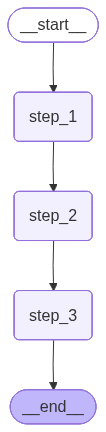

In [6]:
workflow

In [7]:
try:
    print("Running graph, manually interrupt during step2")
    workflow.invoke({'input':"start"},config={'configurable':{"thread_id":"1"}})

except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated)")
     
    
    

Running graph, manually interrupt during step2
Step 1 executed
Step 2 hanging ... manually interrupt from keyboard
Kernel manually interrupted (crash simulated)


In [8]:
workflow.get_state({'configurable':{"thread_id":"1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1acf-f3f5-6e72-8001-d61d758eb964'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-12-25T16:15:58.145291+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1acf-eef7-6135-8000-72b1796851d7'}}, tasks=(PregelTask(id='16d1c246-f3e4-0006-a0d5-a73399ad54ec', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [9]:
# resuming to check tolerance
workflow.invoke(None,config={'configurable':{"thread_id":"1"}})


Step 2 hanging ... manually interrupt from keyboard
Step 3 executed


{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}

In [10]:
workflow.get_state({'configurable':{"thread_id":"1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1ae9-dc8b-67cf-8003-6dc1d12c1a03'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-12-25T16:27:33.622164+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1ae9-dc7f-61e8-8002-ce711d3c18c1'}}, tasks=(), interrupts=())